# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url
temp_units = "Imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID={weather_api_key}&q="

In [4]:
#response = requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
#lists
city_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities
count_one = 0
set_one = 1

# loop for dataframe 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | wellington
Processing Record 7 of Set 1 | chumikan
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | praia
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | changli
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | moose factory
City not found. Skipping...
Processing Record 18 of Set 1 | clinton
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | dudinka
City not found. Skipping...
Processing Record 21 of Set 1 | rincon
Processing Record 22 of Set 1 | itacare
Processing Record 23 of Set 1 

Processing Record 34 of Set 4 | east london
Processing Record 35 of Set 4 | okitipupa
Processing Record 36 of Set 4 | peniche
Processing Record 37 of Set 4 | skibbereen
Processing Record 38 of Set 4 | port huron
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 4 | gwadar
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | chicama
Processing Record 45 of Set 4 | galesburg
Processing Record 46 of Set 4 | fare
Processing Record 47 of Set 4 | xuddur
Processing Record 48 of Set 4 | miandrivazo
Processing Record 49 of Set 4 | serenje
Processing Record 50 of Set 4 | rockledge
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | balkhash
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | dapaong
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | camacari
City not foun

City not found. Skipping...
Processing Record 21 of Set 8 | airai
Processing Record 22 of Set 8 | fergus falls
Processing Record 23 of Set 8 | bagdarin
Processing Record 24 of Set 8 | kachiry
Processing Record 25 of Set 8 | aden
Processing Record 26 of Set 8 | miles city
Processing Record 27 of Set 8 | marzuq
Processing Record 28 of Set 8 | bilma
Processing Record 29 of Set 8 | gazojak
Processing Record 30 of Set 8 | skelleftea
Processing Record 31 of Set 8 | poya
Processing Record 32 of Set 8 | pochutla
Processing Record 33 of Set 8 | susurluk
Processing Record 34 of Set 8 | okato
Processing Record 35 of Set 8 | olavarria
Processing Record 36 of Set 8 | bereda
Processing Record 37 of Set 8 | lodja
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | ulety
Processing Record 40 of Set 8 | ourossogui
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | iwaki
Processing Record 43 of Set 8 | tamale
Processing Record 44 of Set 8 | kamenka
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dictionary
weather_dictionary = {
    "City": city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
}

#create dataframe
weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,45.00,70,90,9.17,US,1603681659
1,nikolskoye,59.70,30.79,43.00,93,90,8.95,RU,1603681664
2,padang,-0.95,100.35,83.70,60,100,2.53,ID,1603681594
3,cherskiy,68.75,161.30,16.18,96,100,2.57,RU,1603681627
4,vaini,-21.20,-175.20,73.40,94,90,10.29,TO,1603681681


In [7]:
#save to csv file
weather_df.to_csv(output_data_file)

In [8]:
#dataframe description
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,22.261111,18.337037,58.657519,72.661111,54.020370,7.647759,1.603682e+09
std,31.553856,88.403830,21.154131,21.458809,40.695776,5.967356,4.397238e+02
min,-54.800000,-179.170000,2.050000,1.000000,0.000000,0.430000,1.603682e+09
25%,-3.027500,-54.477500,43.105000,61.000000,7.000000,3.325000,1.603682e+09
50%,25.785000,22.575000,62.625000,79.000000,70.000000,6.210000,1.603683e+09
75%,47.487500,89.210000,76.440000,89.000000,94.250000,10.290000,1.603683e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,61.070000,1.603683e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#print out any cities with humidity over 100, store in new DF. 
humidity_errors = weather_df.loc[weather_df["Humidity"] > 100]
humidity_errors

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
#none exist 

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no cities exist with humidity over 100. skipping this step as the df is already clean

No cities in the dataframe reported humidity over 100%, no need to clean the data further


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

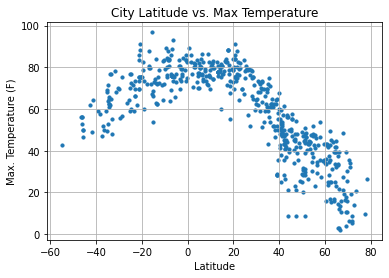

In [30]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_temperature_plot.png")

#show
plt.show()

This scatter plot compares the latitudes and max temperatures of cities in our dataset. Temperatures closest to the equator (0) appear to be highest overall. Tempareratures drop slightly for locations in the southern hemisphere (negative latitudes), but we see a more significant drop in temperature the more north of the equator we go (positive latitudes). 

## Latitude vs. Humidity Plot

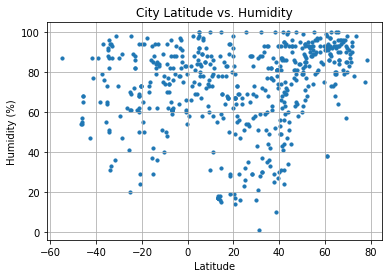

In [31]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_humidity_plot.png")

#show
plt.show()

This scatter plot looks at our cities locations in comparison to their humidity percentages. Visually we see that the majority of cities in our data set have humidity percentages of 60% and above. A good amount of our very northern cities have humidity levels of 80-100%

## Latitude vs. Cloudiness Plot

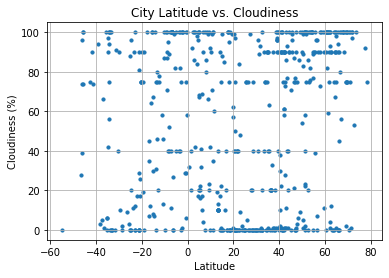

In [32]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_cloudiness_plot.png")

#show
plt.show()

Here we compare city locations and overall cloudiness. We can't make any discernible conclusions from this scatter plot. It doesn't appear that location in relationship to the equator makes much of a difference when it comes to cloudiness.   

## Latitude vs. Wind Speed Plot

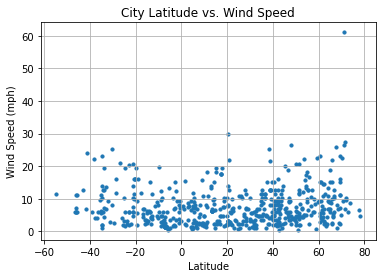

In [33]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

This plot compares city location to wind speed. Thankfully, most cities in our data set do not exceed 20mph, however, we do have one outlier to the north at over 60mph! Conclusion - don't move there :) Overall, it doesn't appear that location relative to the equator has much of an affect on wind speed.

## Linear Regression

In [34]:
north_latitude = weather_df[weather_df['Lat'] >= 0]

south_latitude = weather_df[weather_df['Lat'] < 0]


In [35]:
north_latitude.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,45.00,70,90,9.17,US,1603681659
1,nikolskoye,59.70,30.79,43.00,93,90,8.95,RU,1603681664
3,cherskiy,68.75,161.30,16.18,96,100,2.57,RU,1603681627
6,chumikan,54.72,135.31,36.81,74,0,18.05,RU,1603681602
8,praia,14.92,-23.51,80.60,69,0,18.34,CV,1603681692


In [36]:
south_latitude.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,padang,-0.95,100.35,83.70,60,100,2.53,ID,1603681594
4,vaini,-21.20,-175.20,73.40,94,90,10.29,TO,1603681681
5,wellington,-41.29,174.78,64.40,77,74,24.16,NZ,1603681674
7,rikitea,-23.12,-134.97,73.51,82,100,20.31,PF,1603681689
9,hobart,-42.88,147.33,62.01,47,75,12.75,AU,1603681555


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7822458632314697


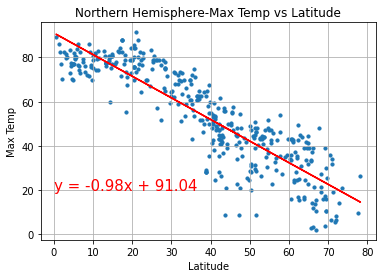

In [37]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
max_temp = north_latitude["Max Temp"]
x = latitude
y = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,max_temp)[0],2)

plt.scatter(x, y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/north_temp_latitude_plot.png")

#show
plt.show()

Here, we're looking at our Northern cities and their max temperatures. There is a significant relationship between the two as we see that the further north we get from the equator, the lower the max temperatures. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.495944793502425


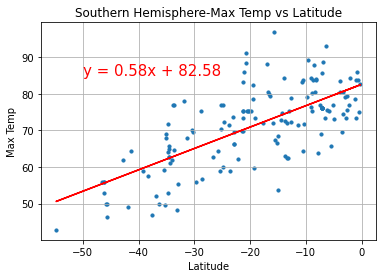

In [38]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
max_temp = south_latitude["Max Temp"]

x = latitude
y = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,max_temp)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title("Southern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/south_temp_latitude_plot.png")

#show
plt.show()

Here we're seeing max tempratures and how they relate to our southern cities. As expected, the temparatures do decrease the further we are from the equator. However, the lowest max temperatures we see in our southern hemisphere are in the 40-50 degree range, in comparison to our northern hemisphere cities getting down to the single digits.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10878498475474466


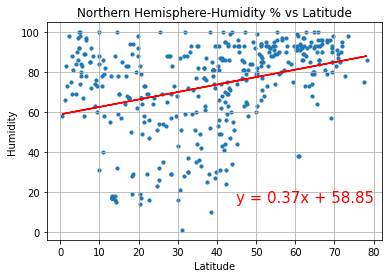

In [39]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
humidity = north_latitude["Humidity"]

x = latitude
y = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,humidity)[0],2)

plt.scatter(x, y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.title("Northern Hemisphere-Humidity % vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/north_humidity_latitude_plot.png")

#show
plt.show()

A good amount of cities in our northern hemisphere have humidity levels of 80-100%. However, there is no statistical relationship between northern hemisphere cities' location from the equator and their humidity levels. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009816734134578427


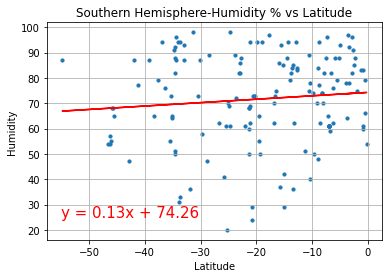

In [41]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
humidity = south_latitude["Humidity"]

x = latitude
y = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,humidity)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere-Humidity % vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/south_humidity_latitude_plot.png")

#show
plt.show()

We see a similar result in our southern hemisphere humidity plot in that there is no statistical relationship between southern cities relative location to the equator and it's humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05829306053225496


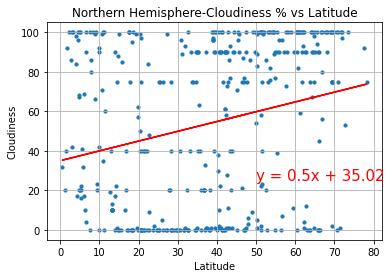

In [43]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
cloudiness = north_latitude["Cloudiness"]

x = latitude
y = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,cloudiness)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.title("Northern Hemisphere-Cloudiness % vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/north_cloudiness_latitude_plot.png")

#show
plt.show()

A lot of cities in the northern hemisphere either have no clouds, or a lot of clouds. But overall, there is no statistical relationship between cloudiness and northern cities' relative location to the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022131106703017732


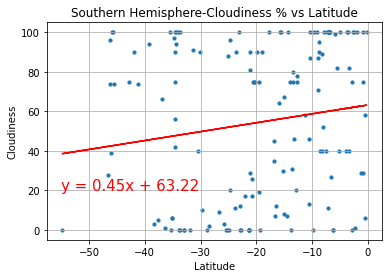

In [44]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
cloudiness = south_latitude["Cloudiness"]

x = latitude
y = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,cloudiness)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Cloudiness % vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/south_cloudiness_latitude_plot.png")

#show
plt.show()

Similar to our northern cities, our southern hempishere cities' relative location to the equator has no statistical impact on cloudiness in those cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050430941319974075


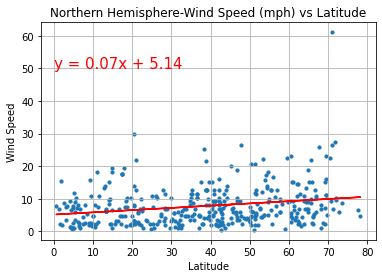

In [46]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
wind_speed = north_latitude["Wind Speed"]

x = latitude
y = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,wind_speed)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere-Wind Speed (mph) vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/north_windspeed_latitude_plot.png")

#show
plt.show()

Our wind speeds to the north are, for the most part, relatively low. However, our cities' locations in relation to the equator do not have a statistical relationship with wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09278958694941605


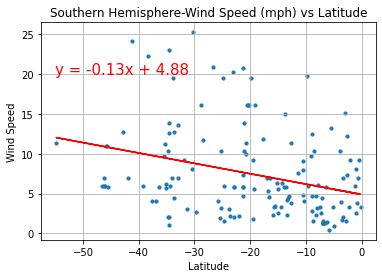

In [48]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
wind_speed = south_latitude["Wind Speed"]

x = latitude
y = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,wind_speed)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Wind Speed (mph) vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
plt.savefig("output_plots/south_windspeed_latitude_plot.png")

#show
plt.show()

Southern cities' wind speeds are much more scattered but also do not have a statistical relationship to cities' locations in relation to the equator. 